In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
plt.rcParams["figure.figsize"] = (10, 10)

In [34]:
data=pd.read_csv('agglotest.csv')

In [35]:
data.head

<bound method DataFrame.head of     label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  28x20  \
0       5    0    0    0    0    0    0    0    0    0  ...        0      0   
1       0    0    0    0    0    0    0    0    0    0  ...        0      0   
2       4    0    0    0    0    0    0    0    0    0  ...        0      0   
3       1    0    0    0    0    0    0    0    0    0  ...        0      0   
4       9    0    0    0    0    0    0    0    0    0  ...        0      0   
5       2    0    0    0    0    0    0    0    0    0  ...        0      0   
6       1    0    0    0    0    0    0    0    0    0  ...        0      0   
7       3    0    0    0    0    0    0    0    0    0  ...        0      0   
8       1    0    0    0    0    0    0    0    0    0  ...        0      0   
9       4    0    0    0    0    0    0    0    0    0  ...        0      0   
10      3    0    0    0    0    0    0    0    0    0  ...        0      0   
11      5    0    0 

In [36]:
X=data.iloc[:,:].values
#X[1:10]

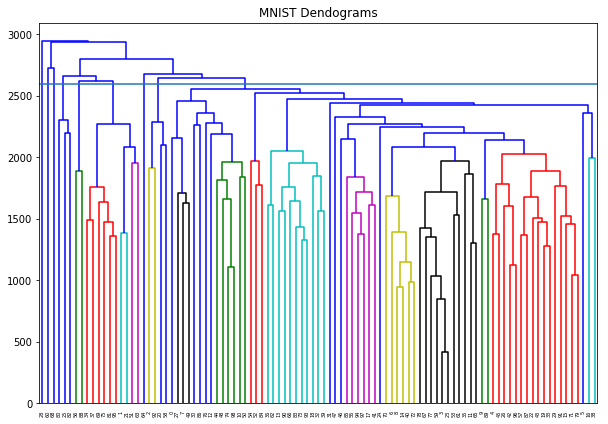

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.axhline(2600)
plt.title("MNIST Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))  

In [38]:
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z, pdist(X))
c

0.7863763739795636

In [8]:
hc = AgglomerativeClustering(n_clusters=9, affinity='manhattan', linkage='average')
y_hc = hc.fit_predict(X)
y_hc

array([0, 2, 3, ..., 0, 0, 0])

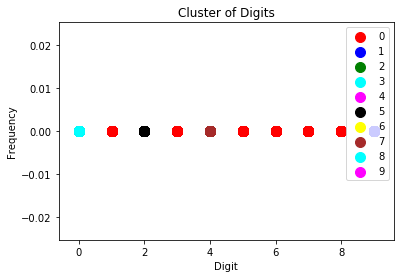

In [9]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = '3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = '4')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'black', label = '5')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'yellow', label = '6')
plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'brown', label = '7')
plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'cyan', label = '8')
plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'magenta', label = '9')
plt.title('Cluster of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
print(silhouette_score(data,y_hc, metric='manhattan'))

0.20965561915399752


In [11]:
hc = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='average')
y_hc = hc.fit_predict(X)
y_hc

array([0, 3, 1, ..., 0, 0, 0])

In [12]:
print(silhouette_score(data,y_hc, metric='euclidean'))

0.1654104423553367


In [13]:
hc = AgglomerativeClustering(n_clusters=9, affinity='cosine', linkage='average')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 4, ..., 8, 0, 0])

In [14]:
print(silhouette_score(data,y_hc, metric='cosine'))

0.2253536459932579


In [15]:
hc = AgglomerativeClustering(n_clusters=9, affinity='l1', linkage='average')
y_hc = hc.fit_predict(X)
y_hc

array([0, 2, 3, ..., 0, 0, 0])

In [71]:
print(silhouette_score(data,y_hc, metric='l1'))

0.13067260930624497


In [16]:
hc = AgglomerativeClustering(n_clusters=9, affinity='l2', linkage='average')
y_hc = hc.fit_predict(X)
y_hc

array([0, 3, 1, ..., 0, 0, 0])

In [17]:
print(silhouette_score(data,y_hc, metric='l2'))

0.1654104423553367


In [19]:
from scipy.spatial.distance import pdist, squareform
squareform(1 - pdist(data, metric='hamming'))

array([[0.        , 0.69808917, 0.68535032, ..., 0.71719745, 0.75286624,
        0.75286624],
       [0.69808917, 0.        , 0.67261146, ..., 0.68280255, 0.69681529,
        0.69681529],
       [0.68535032, 0.67261146, 0.        , ..., 0.68025478, 0.72611465,
        0.72611465],
       ...,
       [0.71719745, 0.68280255, 0.68025478, ..., 0.        , 0.71974522,
        0.71974522],
       [0.75286624, 0.69681529, 0.72611465, ..., 0.71974522, 0.        ,
        1.        ],
       [0.75286624, 0.69681529, 0.72611465, ..., 0.71974522, 1.        ,
        0.        ]])

In [21]:
%timeit squareform(1 - pdist(data, metric='hamming'))

1 loop, best of 3: 4.46 s per loop
